In [6]:
import sys
sys.path.append('../vysxd')
from vysxd_analysis import *
from vysxd_define import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as manimation

First, let's animate a plot of phase space with time.

/tmp/ipykernel_440956/585128454.py:23: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(-p1x1.DATA), origin='lower', extent=[p1x1.X[0], p1x1.X[-1],p1x1.Y[0],p1x1.Y[-1]], aspect='auto', vmin = -6)


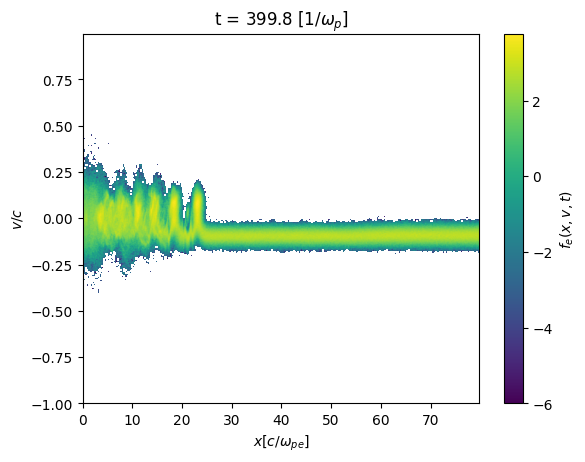

In [7]:
p1x1_files = np.sort(os.listdir('data/MS/PHA/p1x1/electrons/')) # Create a sorted list of filenames you will be analyzing

if not (os.path.isdir('figures')): # Create a directory for the animation, if there isn't one already
    os.makedirs('figures')
# Define the meta data for the movie
FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='phase-space-animation', artist='Matplotlib',
                comment='visualizing the phase space evolution of the distribution function') # Describe what the animation is
writer = FFMpegWriter(fps=24, metadata=metadata) # you can adjust the fps here.

# Initialize the movie
fig = plt.figure()



plt.tight_layout()
# Update the frames for the movie
with writer.saving(fig, f"electron_phase_space.mp4", dpi=400):
    for file in p1x1_files:
        p1x1 = vysxd_get_data(f'data/MS/PHA/p1x1/electrons/{file}') # Pull the phase space data
        plt.clf() # This clears the figure so you don't make a million colorbars lol
        plt.title(f't = {round(p1x1.TIME[0],1)} $[1/\omega_p]$')
        plt.imshow(np.log(-p1x1.DATA), origin='lower', extent=[p1x1.X[0], p1x1.X[-1],p1x1.Y[0],p1x1.Y[-1]], aspect='auto', vmin = -6)
        plt.colorbar(label=r'$f_e(x,v,t)$')
        plt.xlabel(r'$x [c/\omega_{pe}]$') # Might need to rework this if the axes aren't static
        plt.ylabel(r'$v/c$')
        # plt.ylim(-0.3,0.3)
        writer.grab_frame()

/tmp/ipykernel_440956/3595962660.py:23: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(p1x1.DATA), origin='lower', extent=[p1x1.X[0], p1x1.X[-1],p1x1.Y[0],p1x1.Y[-1]], aspect='auto', vmin = -6)


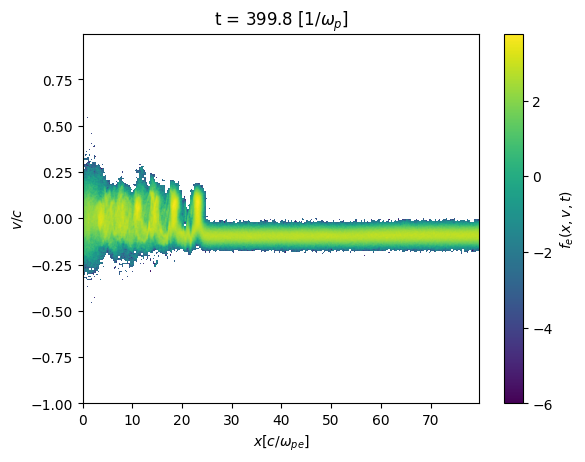

In [8]:
p1x1_files = np.sort(os.listdir('data/MS/PHA/p1x1/positrons/')) # Create a sorted list of filenames you will be analyzing

if not (os.path.isdir('figures')): # Create a directory for the animation, if there isn't one already
    os.makedirs('figures')
# Define the meta data for the movie
FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='phase-space-animation', artist='Matplotlib',
                comment='visualizing the phase space evolution of the distribution function') # Describe what the animation is
writer = FFMpegWriter(fps=24, metadata=metadata) # you can adjust the fps here.

# Initialize the movie
fig = plt.figure()



plt.tight_layout()
# Update the frames for the movie
with writer.saving(fig, f"positron_phase_space.mp4", dpi=400):
    for file in p1x1_files:
        p1x1 = vysxd_get_data(f'data/MS/PHA/p1x1/positrons/{file}') # Pull the phase space data
        plt.clf() # This clears the figure so you don't make a million colorbars lol
        plt.title(f't = {round(p1x1.TIME[0],1)} $[1/\omega_p]$')
        plt.imshow(np.log(p1x1.DATA), origin='lower', extent=[p1x1.X[0], p1x1.X[-1],p1x1.Y[0],p1x1.Y[-1]], aspect='auto', vmin = -6)
        plt.colorbar(label=r'$f_e(x,v,t)$')
        plt.xlabel(r'$x [c/\omega_{pe}]$') # Might need to rework this if the axes aren't static
        plt.ylabel(r'$v/c$')
        # plt.ylim(-0.3,0.3)
        writer.grab_frame()

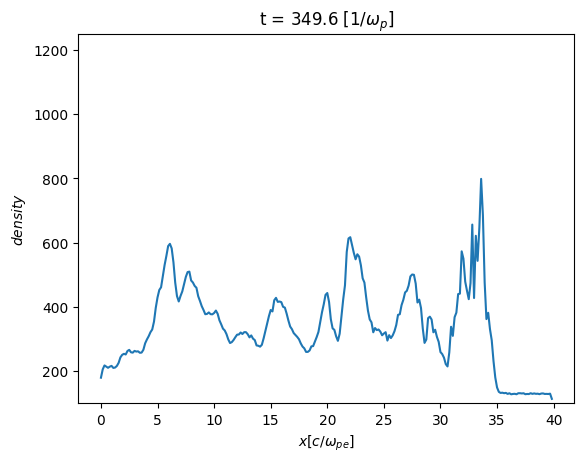

In [21]:
p1x1_files = np.sort(os.listdir('data/MS/PHA/p1x1/electrons/')) # Create a sorted list of filenames you will be analyzing

if not (os.path.isdir('figures')): # Create a directory for the animation, if there isn't one already
    os.makedirs('figures')
# Define the meta data for the movie
FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='phase-space-animation', artist='Matplotlib',
                comment='visualizing the phase space evolution of the distribution function') # Describe what the animation is
writer = FFMpegWriter(fps=24, metadata=metadata) # you can adjust the fps here.

# Initialize the movie
fig = plt.figure()



plt.tight_layout()
# Update the frames for the movie
with writer.saving(fig, f"electron_density-x.mp4", dpi=400):
    for file in p1x1_files:
        p1x1 = vysxd_get_data(f'data/MS/PHA/p1x1/electrons/{file}') # Pull the phase space data
        plt.clf() # This clears the figure so you don't make a million colorbars lol
        plt.title(f't = {round(p1x1.TIME[0],1)} $[1/\omega_p]$')
        plt.plot(p1x1.X, -np.trapz(p1x1.DATA,axis = 0)) # Integrate in v space
        plt.xlabel(r'$x [c/\omega_{pe}]$') # Might need to rework this if the axes aren't static
        plt.ylabel(r'$density$')
        plt.ylim(100,1250)
        writer.grab_frame()

Now, I'm gonna try to make a plot that overlays the information for E field and B field 

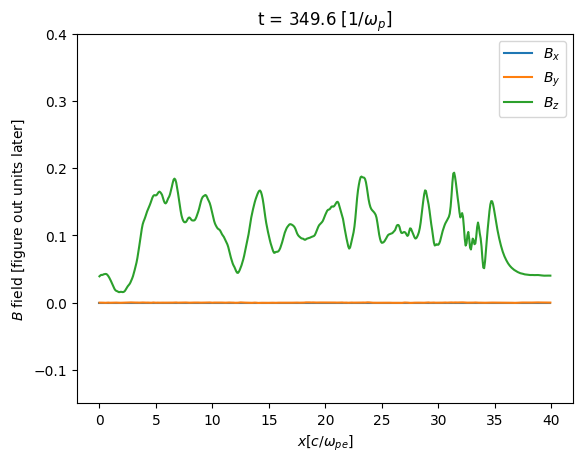

In [22]:
b1_path = 'data/MS/FLD/part_b1/'; b2_path = 'data/MS/FLD/part_b2/'; b3_path = 'data/MS/FLD/part_b3/'
b1_files = np.sort(os.listdir(b1_path)) 
b2_files = np.sort(os.listdir(b2_path))
b3_files = np.sort(os.listdir(b3_path)) # Create a sorted list of filenames you will be analyzing

if not (os.path.isdir('figures')): # Create a directory for the animation, if there isn't one already
    os.makedirs('figures')
# Define the meta data for the movie
FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='b1-space-animation', artist='Matplotlib',
                comment='visualizing the evolution of the normal B field') # Describe what the animation is
writer = FFMpegWriter(fps=24, metadata=metadata) # you can adjust the fps here.

# Initialize the movie
fig = plt.figure()



plt.tight_layout()
# Update the frames for the movie
with writer.saving(fig, f"b1-x.mp4", dpi=400):
    for i in range(len(b1_files)):
        b1 = vysxd_get_data(f'{b1_path}{b1_files[i]}') # Pull the phase space data
        b2 = vysxd_get_data(f'{b2_path}{b2_files[i]}')
        b3 = vysxd_get_data(f'{b3_path}{b3_files[i]}')
        plt.clf() # This clears the figure so you don't make a million colorbars lol
        plt.title(f't = {round(b1.TIME[0],1)} $[1/\omega_p]$')
        plt.plot(b1.X, b1.DATA, label = '$B_x$')
        plt.plot(b2.X, b2.DATA, label = '$B_y$')
        plt.plot(b3.X, b3.DATA, label = '$B_z$') # Integrate in v space
        plt.xlabel(r'$x [c/\omega_{pe}]$') # Might need to rework this if the axes aren't static
        plt.ylabel(r'$B$ field [figure out units later]')
        plt.ylim(-.15,.4)
        plt.legend()
        writer.grab_frame()

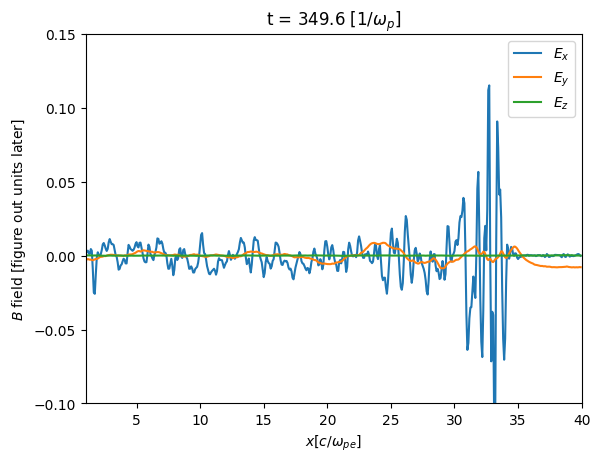

In [6]:
e1_path = 'data/MS/FLD/part_e1/'; e2_path = 'data/MS/FLD/part_e2/'; e3_path = 'data/MS/FLD/part_e3/'
e1_files = np.sort(os.listdir(e1_path)) 
e2_files = np.sort(os.listdir(e2_path))
e3_files = np.sort(os.listdir(e3_path)) # Create a sorted list of filenames you will be analyzing

if not (os.path.isdir('figures')): # Create a directory for the animation, if there isn't one already
    os.makedirs('figures')
# Define the meta data for the movie
FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='b1-space-animation', artist='Matplotlib',
                comment='visualizing the evolution of the normal B field') # Describe what the animation is
writer = FFMpegWriter(fps=24, metadata=metadata) # you can adjust the fps here.

# Initialize the movie
fig = plt.figure()



plt.tight_layout()
# Update the frames for the movie
with writer.saving(fig, f"e1-x.mp4", dpi=400):
    for i in range(len(e1_files)):
        e1 = vysxd_get_data(f'{e1_path}{e1_files[i]}') # Pull the phase space data
        e2 = vysxd_get_data(f'{e2_path}{e2_files[i]}')
        e3 = vysxd_get_data(f'{e3_path}{e3_files[i]}')
        plt.clf() # This clears the figure so you don't make a million colorbars lol
        plt.title(f't = {round(e1.TIME[0],1)} $[1/\omega_p]$')
        plt.plot(e1.X, e1.DATA, label = '$E_x$')
        plt.plot(e2.X, e2.DATA, label = '$E_y$')
        plt.plot(e3.X, e3.DATA, label = '$E_z$') # Integrate in v space
        plt.xlabel(r'$x [c/\omega_{pe}]$') # Might need to rework this if the axes aren't static
        plt.ylabel(r'$B$ field [figure out units later]')
        plt.ylim(-0.10,0.15)
        plt.xlim(1,40)
        plt.legend()
        writer.grab_frame()

It looks like there is a ton of noise in the x direction, like there is some kind of dispersion in the y direction as well...

Almost nothing in the z direction... is this actually graphing over the x direction or z direction lol

We know that $\textbf{E} + \textbf{V} \times \textbf{B} = 0$ We know that $\textbf{B} = B_0 \hat{z}$ and $\textbf{E}$ is in the y direction. So yeah, $v$ must be propogating in the x direction, as expected.

Let's do the same procedure with temperature measurements. Is there an easy way to find temp without needing to take the second moment of the distribution function. I bet that there is